In [ ]:
!pip install pandas
!pip install sklearn
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [ ]:
csv_filename="AirQualityUCI.csv"
df=pd.read_csv(csv_filename, sep=";" , parse_dates= ['Date','Time'])

<ipython-input-3-37171da40617>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv(csv_filename, sep=";" , parse_dates= ['Date','Time'])


In [ ]:
df.dropna(how="all",axis=1,inplace=True)
df.dropna(how="all",axis=0,inplace=True)

In [ ]:
cols = list(df.columns[2:]) # every column except first two - removing date and time
for col in cols:
    if df[col].dtype != 'float64':
        str_x = pd.Series(df[col]).str.replace(',','.')
        float_X = []
        for value in str_x.values:
            fv = float(value)
            float_X.append(fv)

            df[col] = pd.DataFrame(float_X)

df.head()
print(df.shape)

(9357, 15)


In [ ]:
features = list(df.columns)
features.remove('Date')
features.remove('Time')
features.remove('C6H6(GT)')

print(features)

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [ ]:
X = df[features]
y = df['C6H6(GT)']
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)

(5614, 12) (5614,)


In [ ]:
X = df[features]
y = df['C6H6(GT)']

In [ ]:
# feature normalization using mean normalization -> If the values of features vary in multiple
def feature_normalize(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0, ddof=1) # also can use range(max - min) 
  x_norm = (X - mean)/std
  return x_norm, mean, std

In [ ]:
X, x_mean, std = feature_normalize(X)
n_mean = np.mean(X, axis = 0) # mean
n_std = np.std(X, axis=0, ddof=1)

In [ ]:
X = np.hstack((np.ones((X.shape[0], 1)), X))
print(f"Final dataset without labels: {X}")

Final dataset without labels: [[ 1.          0.47397457  0.94293237 ...  0.08845774  0.18382133
   0.19487051]
 [ 1.          0.4662483   0.73676725 ...  0.08151388  0.16039122
   0.19404181]
 [ 1.          0.46882372  1.07026965 ...  0.04910919  0.28339931
   0.19467552]
 ...
 [ 1.          0.47139915  0.28199125 ...  0.3963023  -0.41364652
   0.19186358]
 [ 1.          0.46753601 -0.13943451 ...  0.42870699 -0.50736696
   0.18861292]
 [ 1.          0.46882372  0.06673061 ...  0.43333623 -0.515177
   0.18832814]]


In [ ]:
# cost function
def compute_cost(X, y, w):
  m, n = X.shape
  predictions = X.dot(w)
  errors = np.subtract(predictions, y)
  mse = np.square(errors) # more sophisticated (mean square error)
  J = 1/(2 * m)*np.sum(mse)
  return J

def gradient_descent(X, y, w, alpha=0.15, iterations=400):
  cost_history = np.zeros(iterations)
  m, n = X.shape
  for i in range(iterations):
    predictions = X.dot(w)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors); # derivative of loss function
    w = w - sum_delta;

    cost_history[i] = compute_cost(X, y, w)
  return w, cost_history

In [ ]:
# 60% training and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
w = np.zeros(X.shape[1])
w, cost_history = gradient_descent(X_train, y_train, w)

In [ ]:
y_pred = X_test.dot(w)
print(f"Predictions: {y_pred}")
print(len(y_pred))

Predictions: [ 4.57700281 -1.87758104  0.93008991 ...  1.58262821 -1.36078149
  7.16054841]
3743


In [ ]:
mse = np.square(np.subtract(y_pred, y_test))
r_square = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

In [ ]:
reg = LinearRegression().fit(X, y)

print(f"Implemented model r-square value: {r_square}")
print(f"Implemented model calculated weights: {w}\n")
print(f"Inbuilt model r-square value: {reg.score(X, y)}")
print(f"Inbuilt model calculated weights: {reg.coef_}")

Implemented model r-square value: 0.9984631067001972
Implemented model calculated weights: [ 1.88368431 -0.06391879  2.05169368  0.01644706 12.07574177  0.01601769
  3.03823305  0.04885872 -3.6538892   0.40046732 11.26032164  5.01944525
 15.97343259]

Inbuilt model r-square value: 0.9992430386100554
Inbuilt model calculated weights: [ 0.00000000e+00 -1.43266218e-02  6.63990690e-01 -1.78862016e-01
  9.68023626e+00  6.62775307e-01  1.33661167e+00 -5.17271103e-01
  5.60281129e-01 -2.18244237e-01 -4.29971171e+00 -1.25214589e+00
  3.83029533e+01]


In [ ]:
# print(f"Cost history of train data: {cost_history}")
# print(len(cost_history))

In [ ]:
# calculating cost_history for test data
cost_history_test = np.zeros(400)
w_test = np.zeros(X.shape[1])
w_test, cost_history_test = gradient_descent(X_test, y_pred, w_test)
# print(f"Cost history of test data: {cost_history_test}")
# print(len(cost_history_test))

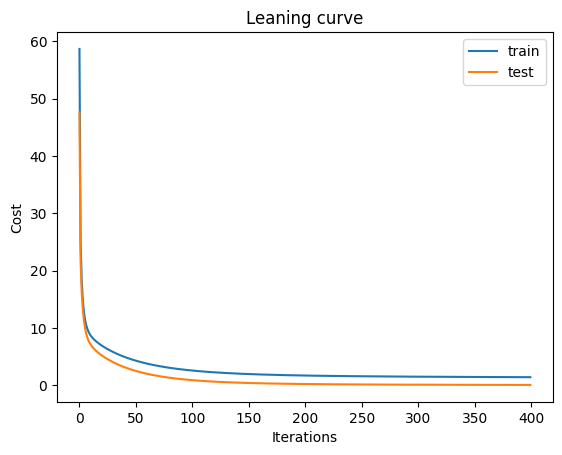

In [ ]:
plt.plot(cost_history, label="train")
plt.plot(cost_history_test, label="test")
plt.title("Leaning curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()